In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
import matplotlib.pyplot as plt
from pandas_ml_utils import FeaturesAndLabels, Model
from pandas_ml_utils.ml.data.extraction import extract_with_post_processor
from pandas_ml_quant import pd, np, PostProcessedFeaturesAndLabels

# just in case of GPU issues
os.environ["CUDA_VISIBLE_DEVICES"] = ""

automatically imported pandas_ml_utils 0.1.2


In [91]:
space = np.linspace(0,1, 13)
for i in range(0, len(space), 5):
    print(space[i:i+5])

[0.         0.08333333 0.16666667 0.25       0.33333333]
[0.41666667 0.5        0.58333333 0.66666667 0.75      ]
[0.83333333 0.91666667 1.        ]


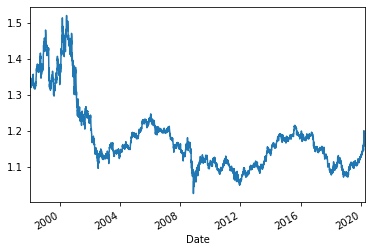

In [90]:
a="SPY"
n="DIA"
df = pd.fetch_yahoo(a, n, multi_index=True)

dfd = df[a] / df[n]
dfd["Close"].plot()

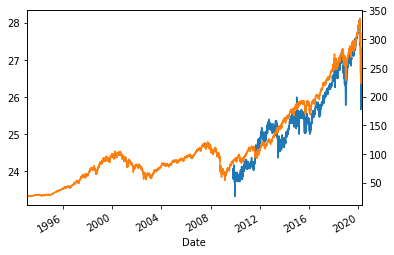

In [46]:
pd.fetch_yahoo("CPI")["Close"].plot()
pd.fetch_yahoo("SPY")["Close"].plot(secondary_y=True)

In [77]:
both = pd.read_csv("/home/kic/downloads/monthly_csv.csv", parse_dates=True, index_col="Date").join(pd.fetch_yahoo("CLI")).dropna()
lala = (both["Close"] / both["Price"]).rename("lala")

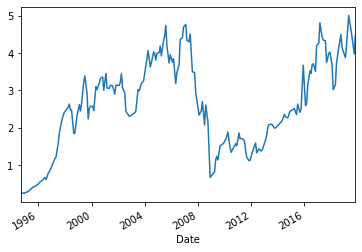

In [89]:
x = lala.to_frame().join(pd.fetch_yahoo("SPY"))
(x["Close"] * x["lala"]).plot()

ρ = x cos θ + y sin θ

where:
ρ (rho) = distance from origin to the line. [-max_dist to max_dist].
          max_dist is the diagonal length of the image.  
θ = angle from origin to the line. [-90° to 90°]


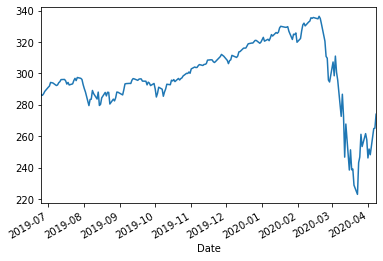

In [2]:
spy = pd.fetch_yahoo("SPY")
close = spy["Close"]
c = close[-200:]
c.plot()

(180, 200) (180,)


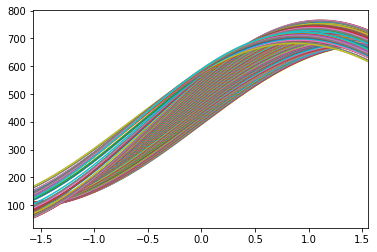

In [52]:
x = np.arange(0, len(c), 1)
y = c

ta = np.deg2rad(np.arange(-90.0, 90.0))
diag = np.sqrt(x.max() ** 2 + y.max() ** 2)

cos_ta = np.cos(ta)
sin_ta = np.sin(ta)


rhos = np.vstack([i * cos_ta + price * sin_ta + diag for i, price in enumerate(c)]).T


print(rhos.shape, ta.shape)
df_ta_rho = pd.DataFrame(rhos, index = ta)
df_ta_rho.plot(legend=None)

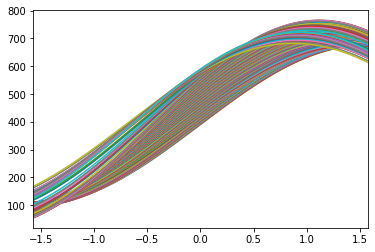

In [196]:
x = np.arange(0, len(c), 1)
y = c

ta = np.deg2rad(np.linspace(-90.0, 90.0, len(x)))
diag = np.sqrt(x.max() ** 2 + y.max() ** 2)

cos_ta = np.cos(ta)
sin_ta = np.sin(ta)

foo = np.outer(cos_ta, x) + np.outer(sin_ta, y) + diag

x.shape, cos_ta.shape, foo.shape
df_ta_rho = pd.DataFrame(foo, index = ta)
df_ta_rho.plot(legend=None)

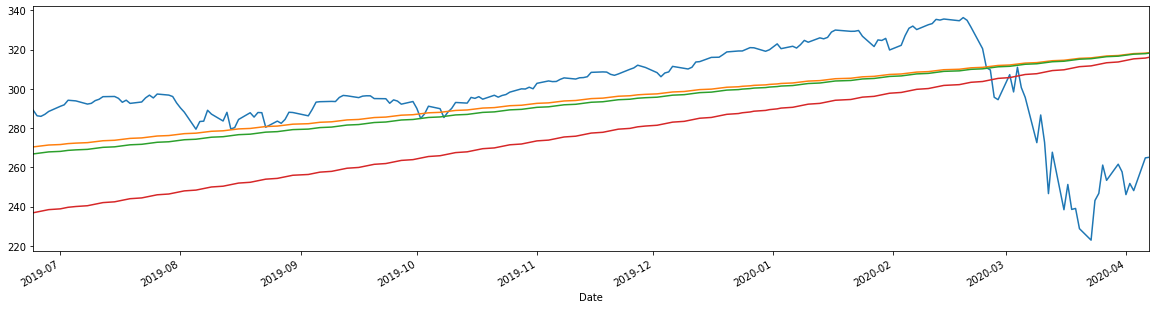

In [140]:
def max_count(row):
    nr, cnt = np.unique(row.round(), return_counts=True)
    return cnt.max()

def max_count(row):
    nr, cnt = np.unique(row.round(), return_counts=True)
    return nr[cnt.argmax()] if 18 > cnt.max() > 15  else 0

    
max_count(foo[0])
brr = df_ta_rho.apply(max_count, axis=1, raw=True)

c.plot(figsize=(20, 5))
for t, r in brr[brr > 0].to_dict().items():
    pd.Series((r - x * np.cos(t)) / np.sin(t) + diag, index=c.index).plot()

In [153]:
pairs = np.vstack([df_ta_rho[['index', col]].values for col in df_ta_rho.columns if col != 'index'])
pairs.shape

(40000, 2)

In [159]:
from sklearn.cluster import DBSCAN
model = DBSCAN(min_samples=10).fit(pairs)

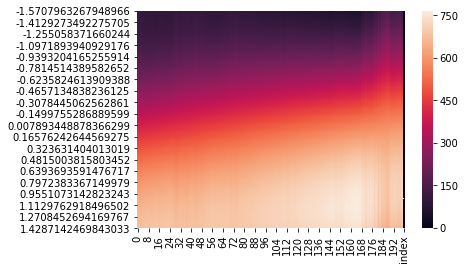

In [164]:
import seaborn as sns
sns.heatmap(df_ta_rho)

In [282]:
s = spy[["Close", "High", "Low"]]
s0 = spy["Close"][-202:]
s1 = s.ta.rnn(3)[-200:].swaplevel(0, 1, axis=1)
s1.tail()

Close                    High                     Low          \
                 0       1       2       0       1       2       0       1   
Date                                                                         
2020-04-01  246.15  257.75  261.65  257.66  263.33  262.43  243.90  256.22   
2020-04-02  251.83  246.15  257.75  252.68  257.66  263.33  244.59  243.90   
2020-04-03  248.19  251.83  246.15  253.32  252.68  257.66  245.22  244.59   
2020-04-06  264.86  248.19  251.83  267.00  253.32  252.68  248.17  245.22   
2020-04-07  265.18  264.86  248.19  275.03  267.00  253.32  264.89  248.17   

                    
                 2  
Date                
2020-04-01  253.53  
2020-04-02  256.22  
2020-04-03  243.90  
2020-04-06  244.59  
2020-04-07  245.22

In [211]:
s2 = s1.ta.rescale((0, 1), digits=4).apply(lambda row: [row.min(), row.max()], raw=False, axis=1, result_type='expand')
#s2 = s1.apply(lambda row: [row.min(), row.max()], raw=False, axis=1, result_type='expand')
s2.tail()

,0,1
Date,,
2020-04-01,0.2158,0.3792
2020-04-02,0.2158,0.3792
2020-04-03,0.2158,0.3315
2020-04-06,0.2216,0.4101
2020-04-07,0.2269,0.4777


(200,) (60,) (60, 200)


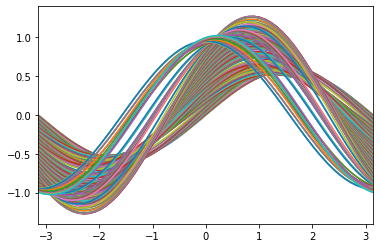

In [332]:
#x = np.arange(0, len(s2), 1)
x = np.linspace(0, 1, len(s2))
y = s2.values[:,0]

#ta = np.around(np.deg2rad(np.linspace(-90.0, 90.0, len(x))), 1)
ta = np.deg2rad(np.linspace(-180.0, 180.0, 60))

cos_ta = np.cos(ta)
sin_ta = np.sin(ta)

foo = np.vstack([x[i] * cos_ta + price * sin_ta for i, price in enumerate(y)]).T
#foo = np.outer(cos_ta, x) + np.outer(sin_ta, y) + 1

print(x.shape, cos_ta.shape, foo.shape)
df_ta_rho = pd.DataFrame(foo, index = ta)
df_ta_rho.plot(legend=None)

In [256]:
df_ta_rho

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
-1.570796,-0.580600,-0.571800,-0.569300,-0.569300,-0.569300,-0.573800,-0.583100,-0.602300,-0.605200,-0.616200,...,5.846304e-17,-0.130800,-0.180800,-0.259100,-0.275900,-0.215800,-0.215800,-0.215800,-0.221600,-0.226900
-1.462466,-0.577196,-0.567905,-0.564876,-0.564333,-0.563789,-0.567720,-0.576422,-0.594966,-0.597306,-0.607698,...,1.032292e-01,-0.026261,-0.075424,-0.152722,-0.168880,-0.108589,-0.108046,-0.107503,-0.112725,-0.117451
-1.354135,-0.567026,-0.557351,-0.553830,-0.552749,-0.551669,-0.554984,-0.562986,-0.580657,-0.582409,-0.592071,...,2.052482e-01,0.078586,0.030836,-0.044553,-0.059880,-0.000105,0.000975,0.002055,-0.002529,-0.006625
-1.245804,-0.550207,-0.540264,-0.536290,-0.534685,-0.533081,-0.535741,-0.542949,-0.559540,-0.560683,-0.569503,...,3.048608e-01,0.182512,0.136734,0.064137,0.049821,0.108380,0.109984,0.111589,0.107697,0.104279
-1.137473,-0.526938,-0.516842,-0.512463,-0.510353,-0.508243,-0.510217,-0.516547,-0.531863,-0.532385,-0.540258,...,4.008991e-01,0.284298,0.241029,0.172076,0.158939,0.215594,0.217704,0.219814,0.216660,0.213960
-1.029142,-0.497491,-0.487360,-0.482627,-0.480037,-0.477446,-0.478711,-0.484089,-0.497950,-0.497844,-0.504679,...,4.922374e-01,0.382751,0.342499,0.277998,0.266193,0.320281,0.322872,0.325463,0.323084,0.321133
-0.920812,-0.462212,-0.452165,-0.447134,-0.444093,-0.441051,-0.441593,-0.445955,-0.458199,-0.457467,-0.463183,...,5.778045e-01,0.476717,0.439953,0.380660,0.370327,0.421213,0.424254,0.427295,0.425719,0.424541
-0.812481,-0.421513,-0.411668,-0.406398,-0.402942,-0.399486,-0.399297,-0.402593,-0.413077,-0.411726,-0.416256,...,6.565975e-01,0.565093,0.532249,0.478859,0.470118,0.517207,0.520662,0.524118,0.523363,0.522971
-0.704150,-0.375872,-0.366346,-0.360897,-0.357067,-0.353237,-0.352320,-0.354511,-0.363111,-0.361158,-0.364450,...,7.276924e-01,0.646844,0.618305,0.571445,0.564398,0.607136,0.610966,0.614796,0.614871,0.615270
-0.595819,-0.325825,-0.316728,-0.311165,-0.307006,-0.302847,-0.301213,-0.302273,-0.308888,-0.306356,-0.308370,...,7.902558e-01,0.721012,0.697112,0.657330,0.652061,0.689948,0.694107,0.698266,0.699171,0.700356


1.0 23


(0, 1)

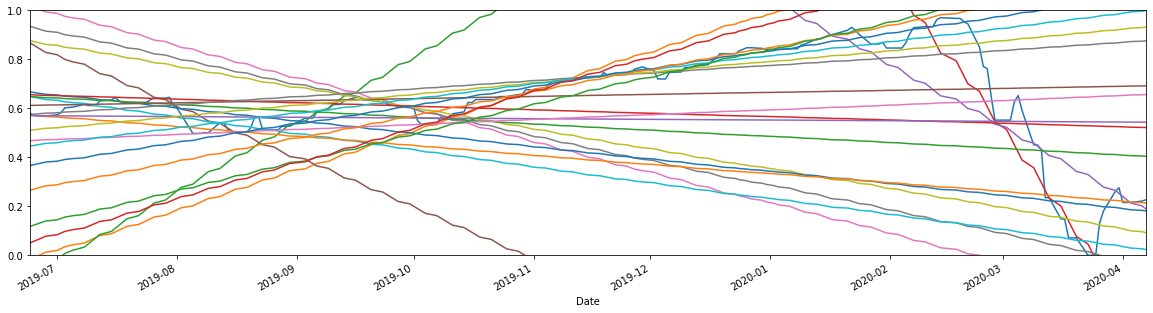

In [333]:
def max_count(row):
    nr, cnt = np.unique(np.around(row, 2), return_counts=True)
    return nr[cnt.argmax()] if cnt.max() > 7 else 0

    
max_count(foo[0])
brr = df_ta_rho.apply(max_count, axis=1, raw=True)
print(brr.max(), len(brr[brr > 0]))

s2[0].plot(figsize=(20, 5))
for t, r in brr[brr > 0].to_dict().items():
    pd.Series((r - x * np.cos(t)) / np.sin(t), index=c.index).plot()
    
df_ta_rho.max()
plt.ylim([0, 1])

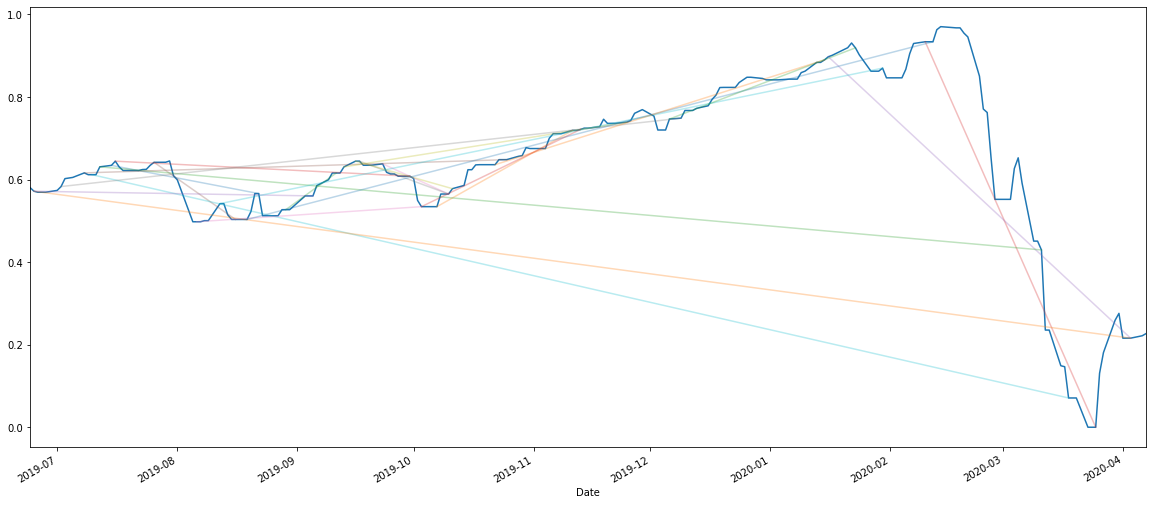

In [343]:
y_price = s2[0].values


def max_count(row):
    nr, cnt = np.unique(np.around(row, 2), return_counts=True)
    return nr[cnt.argmax()] if cnt.max() > 7 else 0

    
max_count(foo[0])
brr = df_ta_rho.apply(max_count, axis=1, raw=True)

d_brr = brr[brr > 0].to_dict()

s2[0].plot(figsize=(20, 9))

for t, r in d_brr.items():
    y_trend = (r - x * np.cos(t)) / np.sin(t)
    x_near = np.argsort((y_trend - y_price) ** 2)[:8]
    
    # print(t, x_near)
    p1 = (x_near.min(), y_price[x_near.min()])
    p2 = (x_near.max(), y_price[x_near.max()])

    plt.plot([s2.index[p1[0]], s2.index[p2[0]]], [p1[1], p2[1]], alpha=0.3)